# Import necessary packages and data files

In [1]:
# import packages
from ema_workbench import ema_logging, load_results, Scenario
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

ema_logging.log_to_stderr(ema_logging.INFO)

file_name = './data/results_step3_simple_masks_4.tar.gz' 
experiments, outcomes = load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\pmg00\Documents\EPA Master program\EPA Master Thesis\Vensim Models\EMA Workbench connection\data\results_step3_simple_masks_4.tar.gz


In [2]:
from ema_workbench import ema_logging, load_results
from ema_workbench.analysis.plotting import lines, Density,kde_over_time, envelopes, multiple_densities
from ema_workbench.analysis import pairs_plotting

c:\users\pmg00\appdata\local\programs\python\python37\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)


In [3]:
from ema_workbench.analysis.plotting_util import Density

In [4]:
from ema_workbench.analysis.pairs_plotting import pairs_density, pairs_lines, pairs_scatter

In [5]:
from ema_workbench.analysis import (prim, dimensional_stacking)

In [6]:
# drop policy settings from experiments data frame
experiments = experiments.drop(['Switch procurement world market PPE',
                                'Switch direct tender PPE',
                                'Switch domestic production PPE',
                                'Switch innovation PPE',
                                'Delay domestic production PPE',
                                'Direct tender set up time PPE',
                                'Set up time procurement PPE worldwide',
                                'Setting up innovation process PPE',
                                'Time to check PPE',
                                'Shipment time to hospitals PPE',
                                'Number of patients',
                                'Delivery time of PPE stockpiling',
                                'Days in Stock',
                                'Order buffer procurement world market PPE',
                                'Order buffer direct tender PPE',
                                'Order buffer domestic production PPE',
                                'Order buffer innovation PPE',
                                'Time to check products',
                                'Shipment time to hospitals',
                                'Time horizon for forecast',
                                'Share of products expiring per day',
                                'Share of stockpile available to hospitals',
                                'Inital value for eye protection in stockpile UK',
                                'Inital value for simple masks in stockpile UK',
                                'Inital value for N95 respirators in stockpile UK',
                                'Inital value for gowns in stockpile UK',
                                'Inital value for gloves in stockpile UK',
                                'Preparation time for delivery PPE',
                                'Government budget for PPE',
                                'Urgentness',
                                'Coverage simple masks',
                                'Coverage N95 respirators',
                                'Coverage gowns',
                                'Coverage gloves',
                                'Total normalized coverage eye protection'], axis =1)

# Explore Outcomes of Experiments with Candidate Policies

[MainProcess/INFO] Coverage simple masks not shown because it is not time series data
[MainProcess/INFO] Coverage gloves not shown because it is not time series data


(<Figure size 432x288 with 1 Axes>,
 {'Shortage of simple masks per day in UK considering threshold': <AxesSubplot:title={'center':'Shortage of simple masks per day in UK considering threshold'}, xlabel='Time', ylabel='Shortage of simple masks per day in UK considering threshold'>})

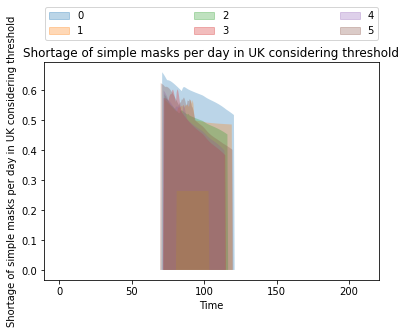

In [7]:
envelopes(experiments, outcomes,outcomes_to_show=['Shortage of simple masks per day in UK considering threshold'],group_by ='policy', grouping_specifiers=None, density=None, fill=True, legend=True, titles={}, ylabels={}, log=False)

<AxesSubplot:title={'center':'Coverage gloves'}, xlabel='[policy]'>

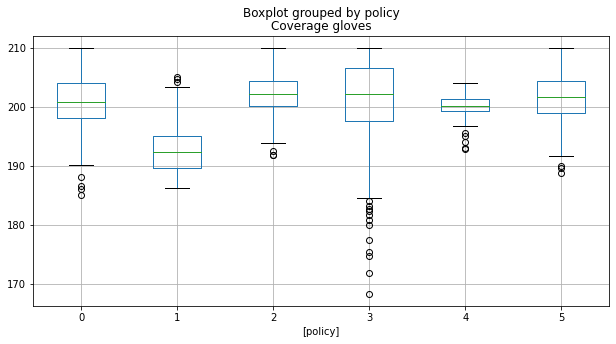

In [8]:
data = pd.DataFrame.from_dict(outcomes['Coverage gloves'])
data =data.rename(columns={0: "Coverage gloves"})
data['policy'] = experiments['policy'].values
data.boxplot(by="policy", figsize=(10, 5))
# plt.savefig('figures/box_plot_candidate_policies.png')

[MainProcess/INFO] Coverage simple masks not shown because it is not time series data
[MainProcess/INFO] Coverage gloves not shown because it is not time series data
[MainProcess/WARNING] singular matrix
c:\users\pmg00\appdata\local\programs\python\python37\lib\site-packages\ema_workbench\analysis\plotting_util.py:364: RuntimeWarning: invalid value encountered in true_divide
  kde_x = kde_x / np.max(kde_x)
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING

[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess

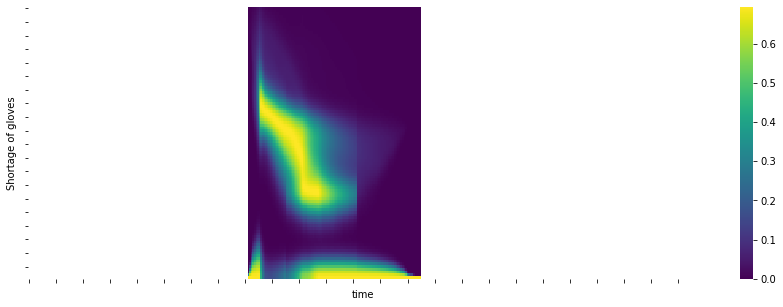

In [9]:
kde_over_time(experiments, outcomes, outcomes_to_show=['Shortage of gloves per day in UK considering threshold'], group_by=None, grouping_specifiers=None, colormap='viridis', log=True)
fig = plt.gcf()

fig.set_size_inches(15,5)
ax = fig.get_axes()

ax[0].set_ylabel('Shortage of gloves')

plt.savefig('figures/kde_shortages_gloves_step3.png')

[MainProcess/INFO] Coverage simple masks not shown because it is not time series data
[MainProcess/INFO] Coverage gloves not shown because it is not time series data


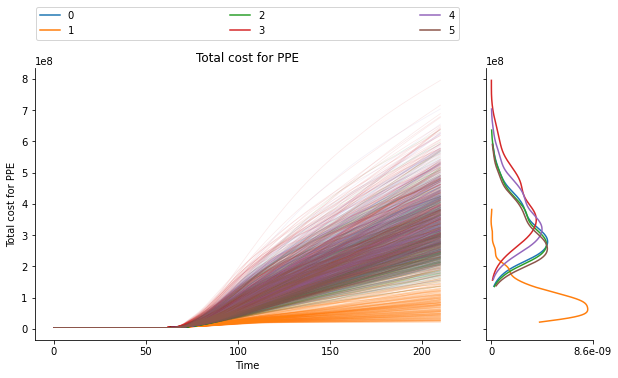

In [10]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = "Total cost for PPE", density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()

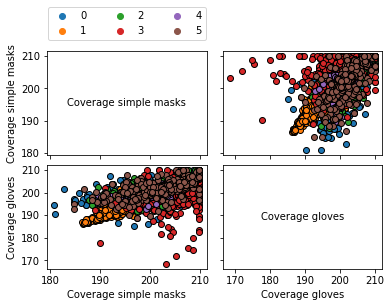

In [11]:
fig,_ = pairs_scatter(experiments, outcomes, outcomes_to_show=['Coverage simple masks','Coverage gloves'], group_by='policy', grouping_specifiers=None, ylabels={}, legend=True, point_in_time=-1, filter_scalar=False)

[MainProcess/INFO] Coverage simple masks not shown because it is not time series data
[MainProcess/INFO] Coverage gloves not shown because it is not time series data


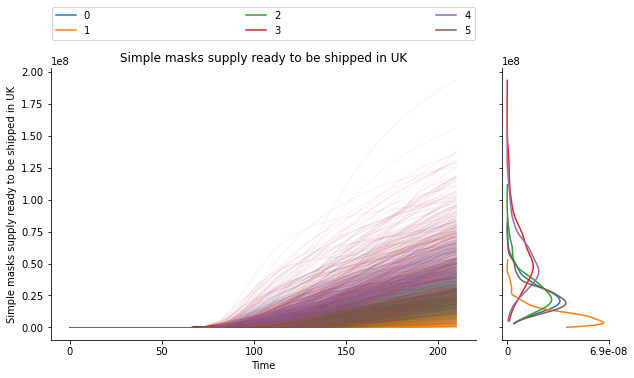

In [12]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Simple masks supply ready to be shipped in UK', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()

[MainProcess/INFO] Coverage simple masks not shown because it is not time series data
[MainProcess/INFO] Coverage gloves not shown because it is not time series data


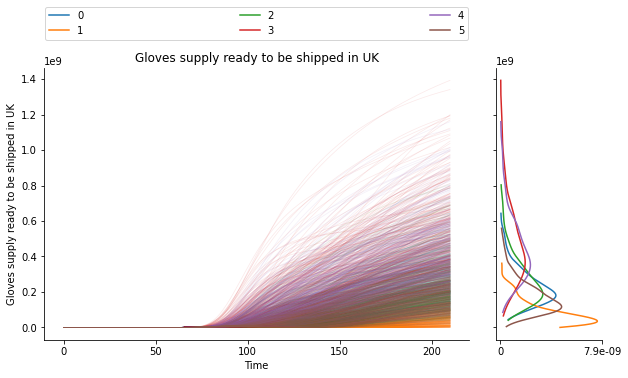

In [13]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Gloves supply ready to be shipped in UK', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()

[MainProcess/INFO] Coverage simple masks not shown because it is not time series data
[MainProcess/INFO] Coverage gloves not shown because it is not time series data
[MainProcess/WARNING] singular matrix
c:\users\pmg00\appdata\local\programs\python\python37\lib\site-packages\ema_workbench\analysis\plotting_util.py:364: RuntimeWarning: invalid value encountered in true_divide
  kde_x = kde_x / np.max(kde_x)
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING

[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess

[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess

Text(33.0, 0.5, 'Shortage Simple Masks')

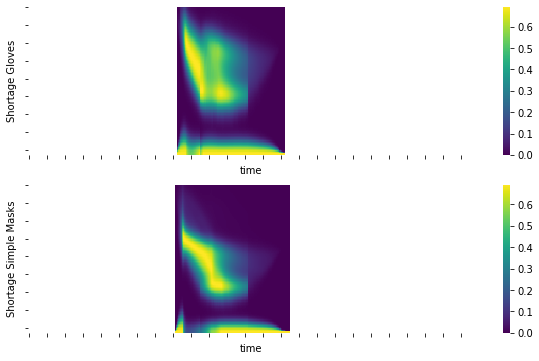

In [14]:
kde_over_time(experiments, outcomes, outcomes_to_show=[
                                                      "Shortage of simple masks per day in UK considering threshold",
                                                      "Shortage of gloves per day in UK considering threshold"], group_by=None, grouping_specifiers=None, colormap='viridis', log=True)

fig = plt.gcf()

fig.set_size_inches(10,6)
ax = fig.get_axes()

ax[0].set_ylabel('Shortage Gloves')
ax[1].set_ylabel('Shortage Simple Masks')
# plt.savefig('figures/kde_shortages_gloves_masks_step3.png')

## Scenario Discovery Worst Case Gloves

In [15]:
experiments = experiments.drop(['policy', 'model'], axis =1)

In [16]:
# identify the threshold for 35% of the worst cases
df_outcome = outcomes['Coverage gloves']
df_outcome = pd.DataFrame(df_outcome)
low_35_percent = df_outcome.quantile(0.35, axis = 0)

In [17]:
low_35_percent = low_35_percent.to_frame()
low_35_percent = low_35_percent[0.35].values[0]

In [18]:
#defining the worst case for coverage gloves
y = outcomes['Coverage gloves'] <low_35_percent

[MainProcess/INFO] 2400 points remaining, containing 840 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.06, coverage: 0.17142857142857143, density: 1.0 restricted_dimensions: 19


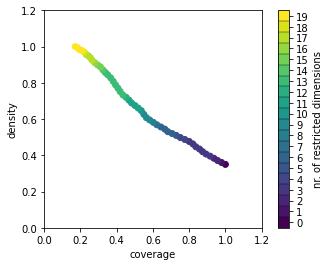

In [19]:
#plotting the trade off between coverage and density
prim_alg = prim.Prim(experiments, y, threshold  = 0.8) 
box1 = prim_alg.find_box()

box1.show_tradeoff()
# plt.savefig("./figures/prim_box_gloves.png")
plt.show()

In [20]:
box1.peeling_trajectory

coverage   density  id    mass      mean res_dim
0   1.000000  0.350000   0  1.0000  0.350000       0
1   0.978571  0.360526   1  0.9500  0.360526       1
2   0.957143  0.371191   2  0.9025  0.371191       2
3   0.936905  0.383528   3  0.8550  0.383528       2
4   0.915476  0.395576   4  0.8100  0.395576       3
5   0.892857  0.407166   5  0.7675  0.407166       3
6   0.873810  0.420389   6  0.7275  0.420389       3
7   0.857143  0.434783   7  0.6900  0.434783       3
8   0.836905  0.447201   8  0.6550  0.447201       3
9   0.820238  0.463038   9  0.6200  0.463038       3
10  0.800000  0.476596  10  0.5875  0.476596       3
11  0.776190  0.487294  11  0.5575  0.487294       4
12  0.751190  0.498420  12  0.5275  0.498420       4
13  0.728571  0.510000  13  0.5000  0.510000       5
14  0.705952  0.520175  14  0.4750  0.520175       6
15  0.682143  0.530556  15  0.4500  0.530556       6
16  0.665476  0.544834  16  0.4275  0.544834       6
17  0.644048  0.556584  17  0.4050  0.556584       6
18  0.621429  0.568627  18  0.3825  0.568627       7
19  0.602381  0.581609  19  0.3625  0.581609       8
20  0.582143  0.594891  20  0.3425  0.594891       9
21  0.564286  0.607692  21  0.3250  0.607692       9
22  0.550000  0.626016  22  0.3075  0.626016       9
23  0.535714  0.646552  23  0.2900  0.646552      10
24  0.519048  0.660606  24  0.2750  0.660606      11
25  0.501190  0.674679  25  0.2600  0.674679      11
26  0.482143  0.688776  26  0.2450  0.688776      11
27  0.467857  0.704301  27  0.2325  0.704301      11
28  0.452381  0.719697  28  0.2200  0.719697      12
29  0.434524  0.732932  29  0.2075  0.732932      13
30  0.419048  0.752137  30  0.1950  0.752137      13
31  0.407143  0.770270  31  0.1850  0.770270      13
32  0.394048  0.788095  32  0.1750  0.788095      13
33  0.380952  0.808081  33  0.1650  0.808081      13
34  0.366667  0.827957  34  0.1550  0.827957      13
35  0.350000  0.844828  35  0.1450  0.844828      13
36  0.336905  0.857576  36  0.1375  0.857576      13
37  0.323810  0.871795  37  0.1300  0.871795      14
38  0.310714  0.887755  38  0.1225  0.887755      15
39  0.295238  0.898551  39  0.1150  0.898551      15
40  0.279762  0.910853  40  0.1075  0.910853      16
41  0.264286  0.925000  41  0.1000  0.925000      17
42  0.254762  0.938596  42  0.0950  0.938596      17
43  0.244048  0.949074  43  0.0900  0.949074      17
44  0.232143  0.955882  44  0.0850  0.955882      17
45  0.221429  0.968750  45  0.0800  0.968750      18
46  0.209524  0.977778  46  0.0750  0.977778      19
47  0.196429  0.982143  47  0.0700  0.982143      19
48  0.184524  0.993590  48  0.0650  0.993590      19
49  0.171429  1.000000  49  0.0600  1.000000      19

### Inspect Box 19 Gloves

coverage    0.602381
density     0.581609
id                19
mass          0.3625
mean        0.581609
res_dim            8
Name: 19, dtype: object

                                                      box 19                \
                                                         min           max   
Reduction export PPE                            1.389984e-03  9.507630e-01   
Base raw material procurement gloves worldwide  2.006181e+08  1.356906e+09   
Shipment time direct tender PPE                 4.688282e+01  1.199270e+02   
Delayed shipment time                           9.851749e+01  3.372297e+02   
Share of faulty PPE                             5.145116e-02  4.998052e-01   
Reach PPE                                       1.726315e+01  2.996095e+02   
change in transportation time PPE               1.003820e+01  5.990723e+01   
Preparation shipment PPE production worldwide   1.415340e+00  9.986934e+00   

                                                                    

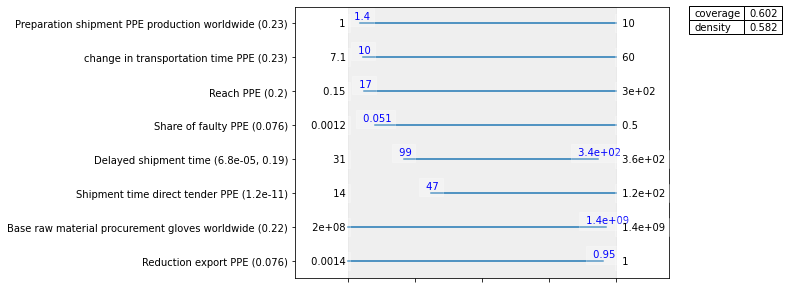

In [21]:
#inspecting boxes
box1.inspect(19)
box1.inspect(19, style='graph')
fig = plt.gcf()
fig.set_size_inches(8,5)
# plt.savefig("./figures/prim_box19_inspect_gloves_worstcase.png")
plt.show()

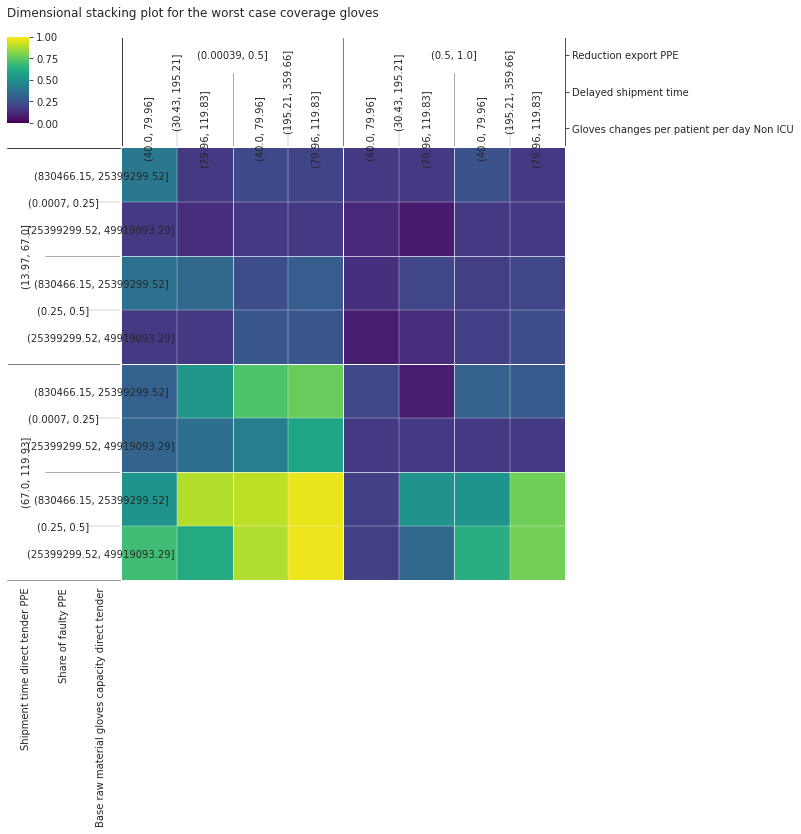

In [22]:
dimensional_stacking.create_pivot_plot(experiments, y, nbins =2, bin_labels=True)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Dimensional stacking plot for the worst case coverage gloves', loc='left', pad=20)
# plt.savefig('./Figures/step_4_dmn_stack_gloves_box19.png')
plt.show()

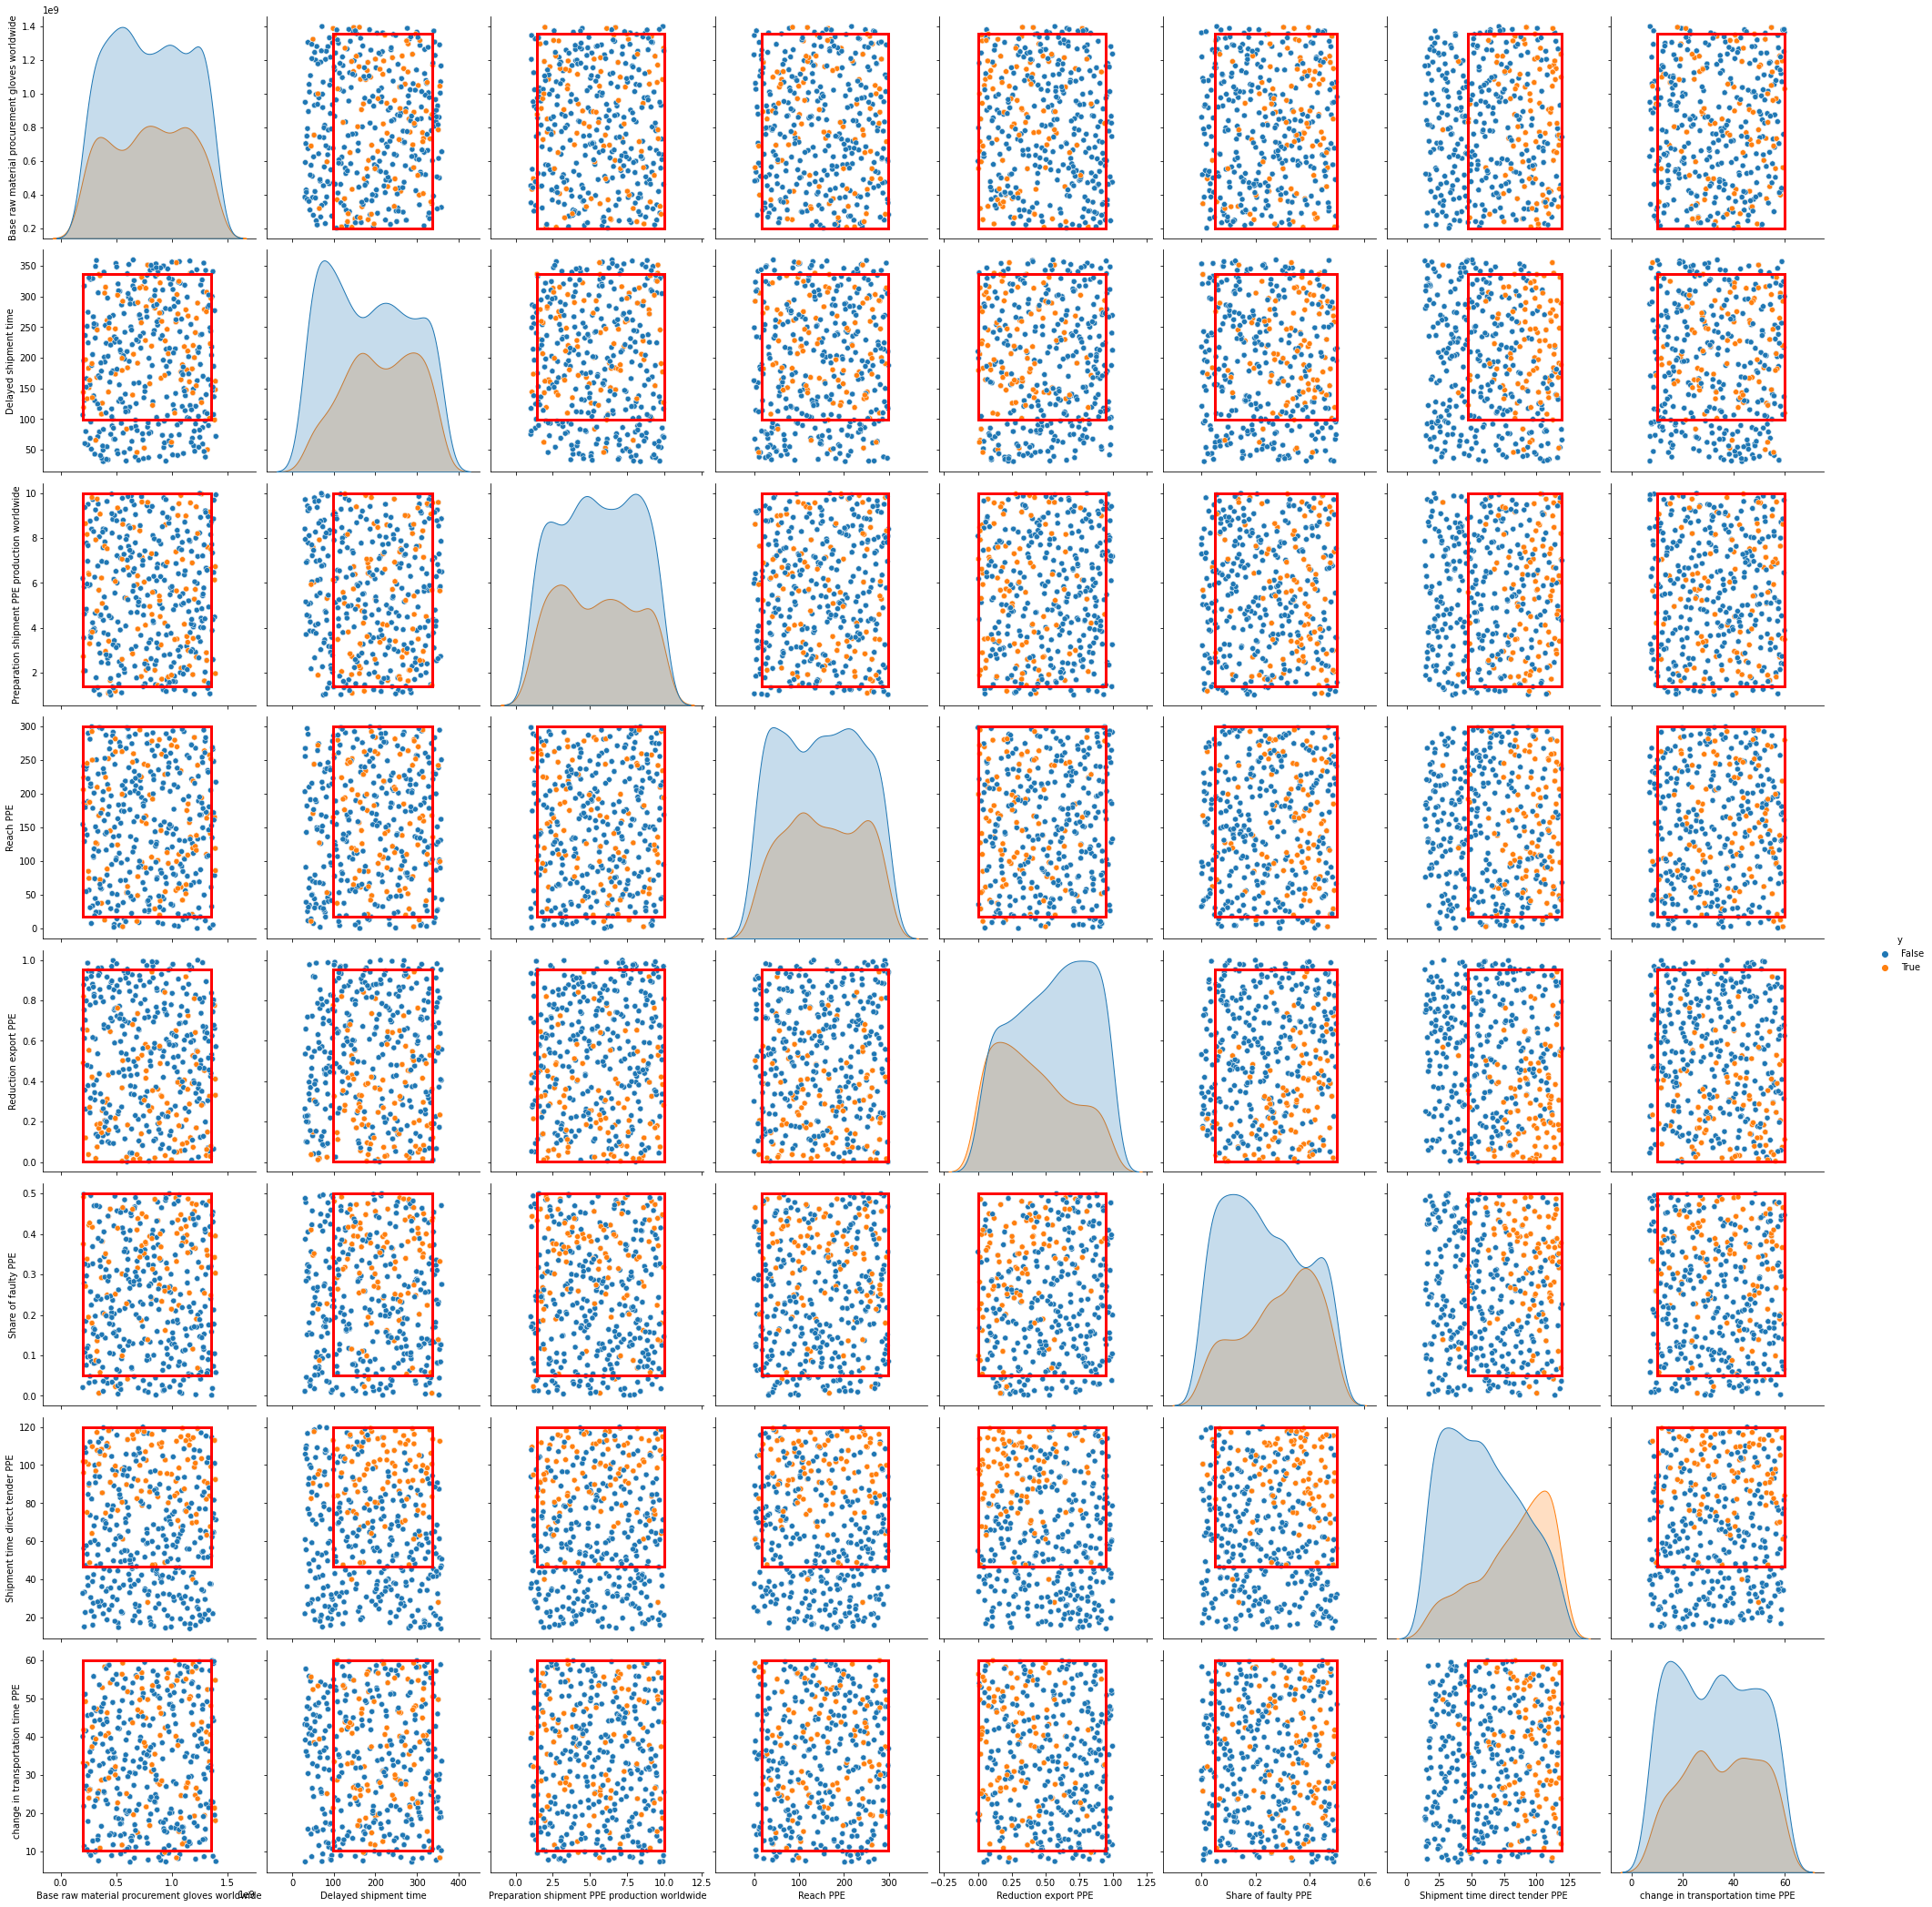

In [23]:
box1.select(19) 
box1.show_pairs_scatter()
fig = plt.gcf()

fig.set_size_inches(30, 30)
# plt.savefig('./figures/step_4_scatter_plot_gloves_box19.png')
plt.show()

## Scenario Discovery Worst Case Simple Masks

In [24]:
#exclude outcome if raw material of other part has impact
experiments = experiments.drop(['Base raw material gloves capacity direct tender'], axis =1)

In [25]:
# identify the threshold for 35% of the worst cases for simple masks
df_outcome = outcomes['Coverage simple masks']
df_outcome = pd.DataFrame(df_outcome)
low_35_percent = df_outcome.quantile(0.35, axis = 0)

In [26]:
low_35_percent = low_35_percent.to_frame()
low_35_percent = low_35_percent[0.35].values[0]

In [27]:
#defiing the worst case for coverage ventilators
y = outcomes['Coverage simple masks'] <low_35_percent

[MainProcess/INFO] 2400 points remaining, containing 840 cases of interest
[MainProcess/INFO] mean: 0.9666666666666667, mass: 0.05, coverage: 0.1380952380952381, density: 0.9666666666666667 restricted_dimensions: 19


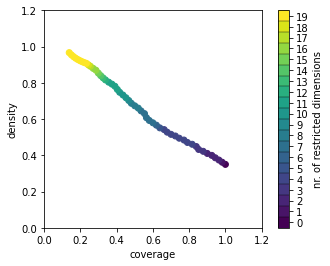

In [28]:
#plotting the trade off between coverage and density
prim_alg = prim.Prim(experiments, y, threshold  = 0.8) 
box1 = prim_alg.find_box()

box1.show_tradeoff()
# plt.savefig("./figures/prim_box_simplemasks_worst_case.png")
plt.show()

In [29]:
box1.peeling_trajectory

coverage   density  id    mass      mean res_dim
0   1.000000  0.350000   0  1.0000  0.350000       0
1   0.982143  0.361842   1  0.9500  0.361842       1
2   0.964286  0.373961   2  0.9025  0.373961       2
3   0.944048  0.386452   3  0.8550  0.386452       2
4   0.925000  0.399691   4  0.8100  0.399691       2
5   0.900000  0.410423   5  0.7675  0.410423       2
6   0.877381  0.422108   6  0.7275  0.422108       3
7   0.852381  0.432367   7  0.6900  0.432367       3
8   0.839286  0.448473   8  0.6550  0.448473       3
9   0.816667  0.461022   9  0.6200  0.461022       4
10  0.790476  0.470922  10  0.5875  0.470922       4
11  0.771429  0.484305  11  0.5575  0.484305       4
12  0.745238  0.494471  12  0.5275  0.494471       4
13  0.723810  0.506667  13  0.5000  0.506667       4
14  0.700000  0.515789  14  0.4750  0.515789       4
15  0.678571  0.527778  15  0.4500  0.527778       4
16  0.661905  0.541910  16  0.4275  0.541910       4
17  0.638095  0.551440  17  0.4050  0.551440       5
18  0.619048  0.566449  18  0.3825  0.566449       6
19  0.600000  0.579310  19  0.3625  0.579310       7
20  0.579762  0.592457  20  0.3425  0.592457       7
21  0.564286  0.607692  21  0.3250  0.607692       7
22  0.553571  0.630081  22  0.3075  0.630081       7
23  0.534524  0.645115  23  0.2900  0.645115       7
24  0.519048  0.660606  24  0.2750  0.660606       8
25  0.500000  0.673077  25  0.2600  0.673077       8
26  0.480952  0.687075  26  0.2450  0.687075       8
27  0.466667  0.702509  27  0.2325  0.702509       9
28  0.451190  0.717803  28  0.2200  0.717803      10
29  0.434524  0.732932  29  0.2075  0.732932      10
30  0.416667  0.747863  30  0.1950  0.747863      10
31  0.403571  0.763514  31  0.1850  0.763514      11
32  0.390476  0.780952  32  0.1750  0.780952      11
33  0.373810  0.792929  33  0.1650  0.792929      11
34  0.355952  0.803763  34  0.1550  0.803763      11
35  0.338095  0.816092  35  0.1450  0.816092      12
36  0.325000  0.827273  36  0.1375  0.827273      13
37  0.311905  0.839744  37  0.1300  0.839744      14
38  0.298810  0.853741  38  0.1225  0.853741      15
39  0.285714  0.869565  39  0.1150  0.869565      16
40  0.270238  0.879845  40  0.1075  0.879845      16
41  0.254762  0.891667  41  0.1000  0.891667      17
42  0.244048  0.899123  42  0.0950  0.899123      18
43  0.233333  0.907407  43  0.0900  0.907407      19
44  0.221429  0.911765  44  0.0850  0.911765      19
45  0.209524  0.916667  45  0.0800  0.916667      19
46  0.197619  0.922222  46  0.0750  0.922222      19
47  0.185714  0.928571  47  0.0700  0.928571      19
48  0.173810  0.935897  48  0.0650  0.935897      19
49  0.161905  0.944444  49  0.0600  0.944444      19
50  0.150000  0.954545  50  0.0550  0.954545      19
51  0.138095  0.966667  51  0.0500  0.966667      19

## Inspect Box 19 Simple Masks

coverage        0.6
density     0.57931
id               19
mass         0.3625
mean        0.57931
res_dim           7
Name: 19, dtype: object

                                                         box 19                \
                                                            min           max   
Reduction export PPE                                   0.001390      0.584981   
Shipment time direct tender PPE                       34.071683    119.927030   
Delayed shipment time                                 45.667666    338.387658   
Share of faulty PPE                                    0.026303      0.499805   
Maximum transportation time PPE procurement wor...     1.759053     19.980874   
change in transportation time PPE                      9.752502     59.907229   
Base raw material simple masks capacity innovat...  4650.736925  33954.466059   

                                                                                                
                            

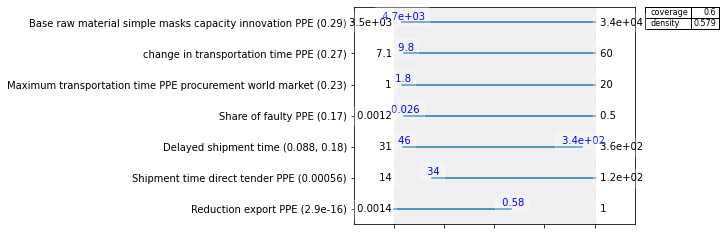

In [30]:
#inspecting boxes
box1.inspect(19)
box1.inspect(19, style='graph')
# plt.savefig("./figures/prim_box19_inspect_simpleMasks.png")
plt.show()

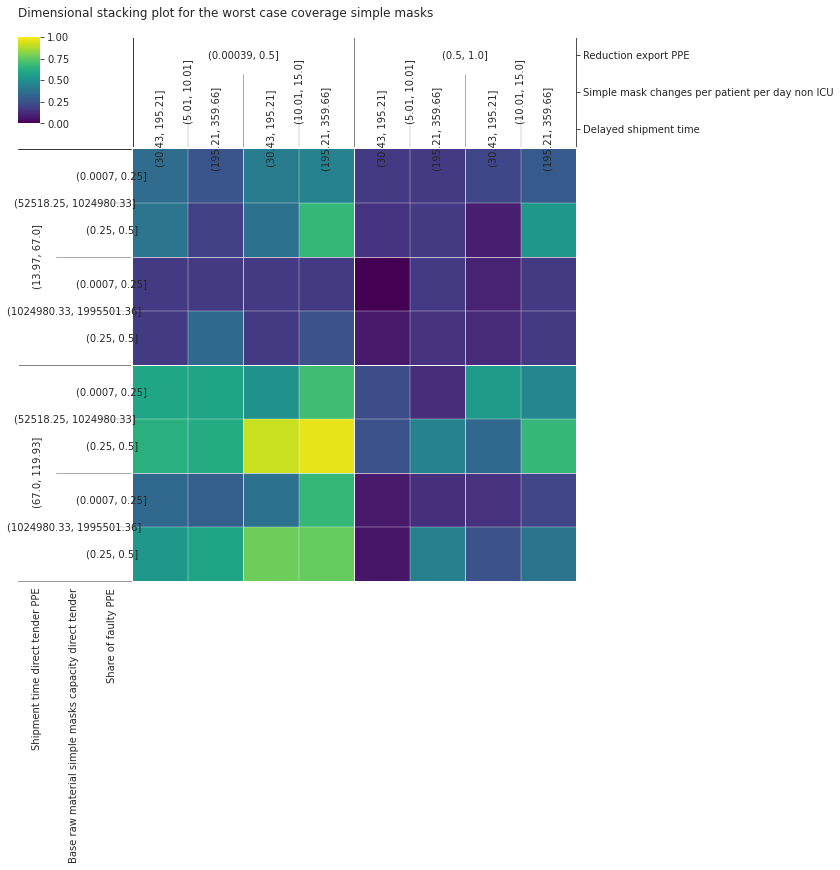

In [31]:
dimensional_stacking.create_pivot_plot(experiments, y, nbins =2, bin_labels=True)
plt.title('Dimensional stacking plot for the worst case coverage simple masks', loc='left', pad=20)
# plt.savefig('./Figures/step_4_dmn_stack_simple_masks_box19.png')
plt.show()

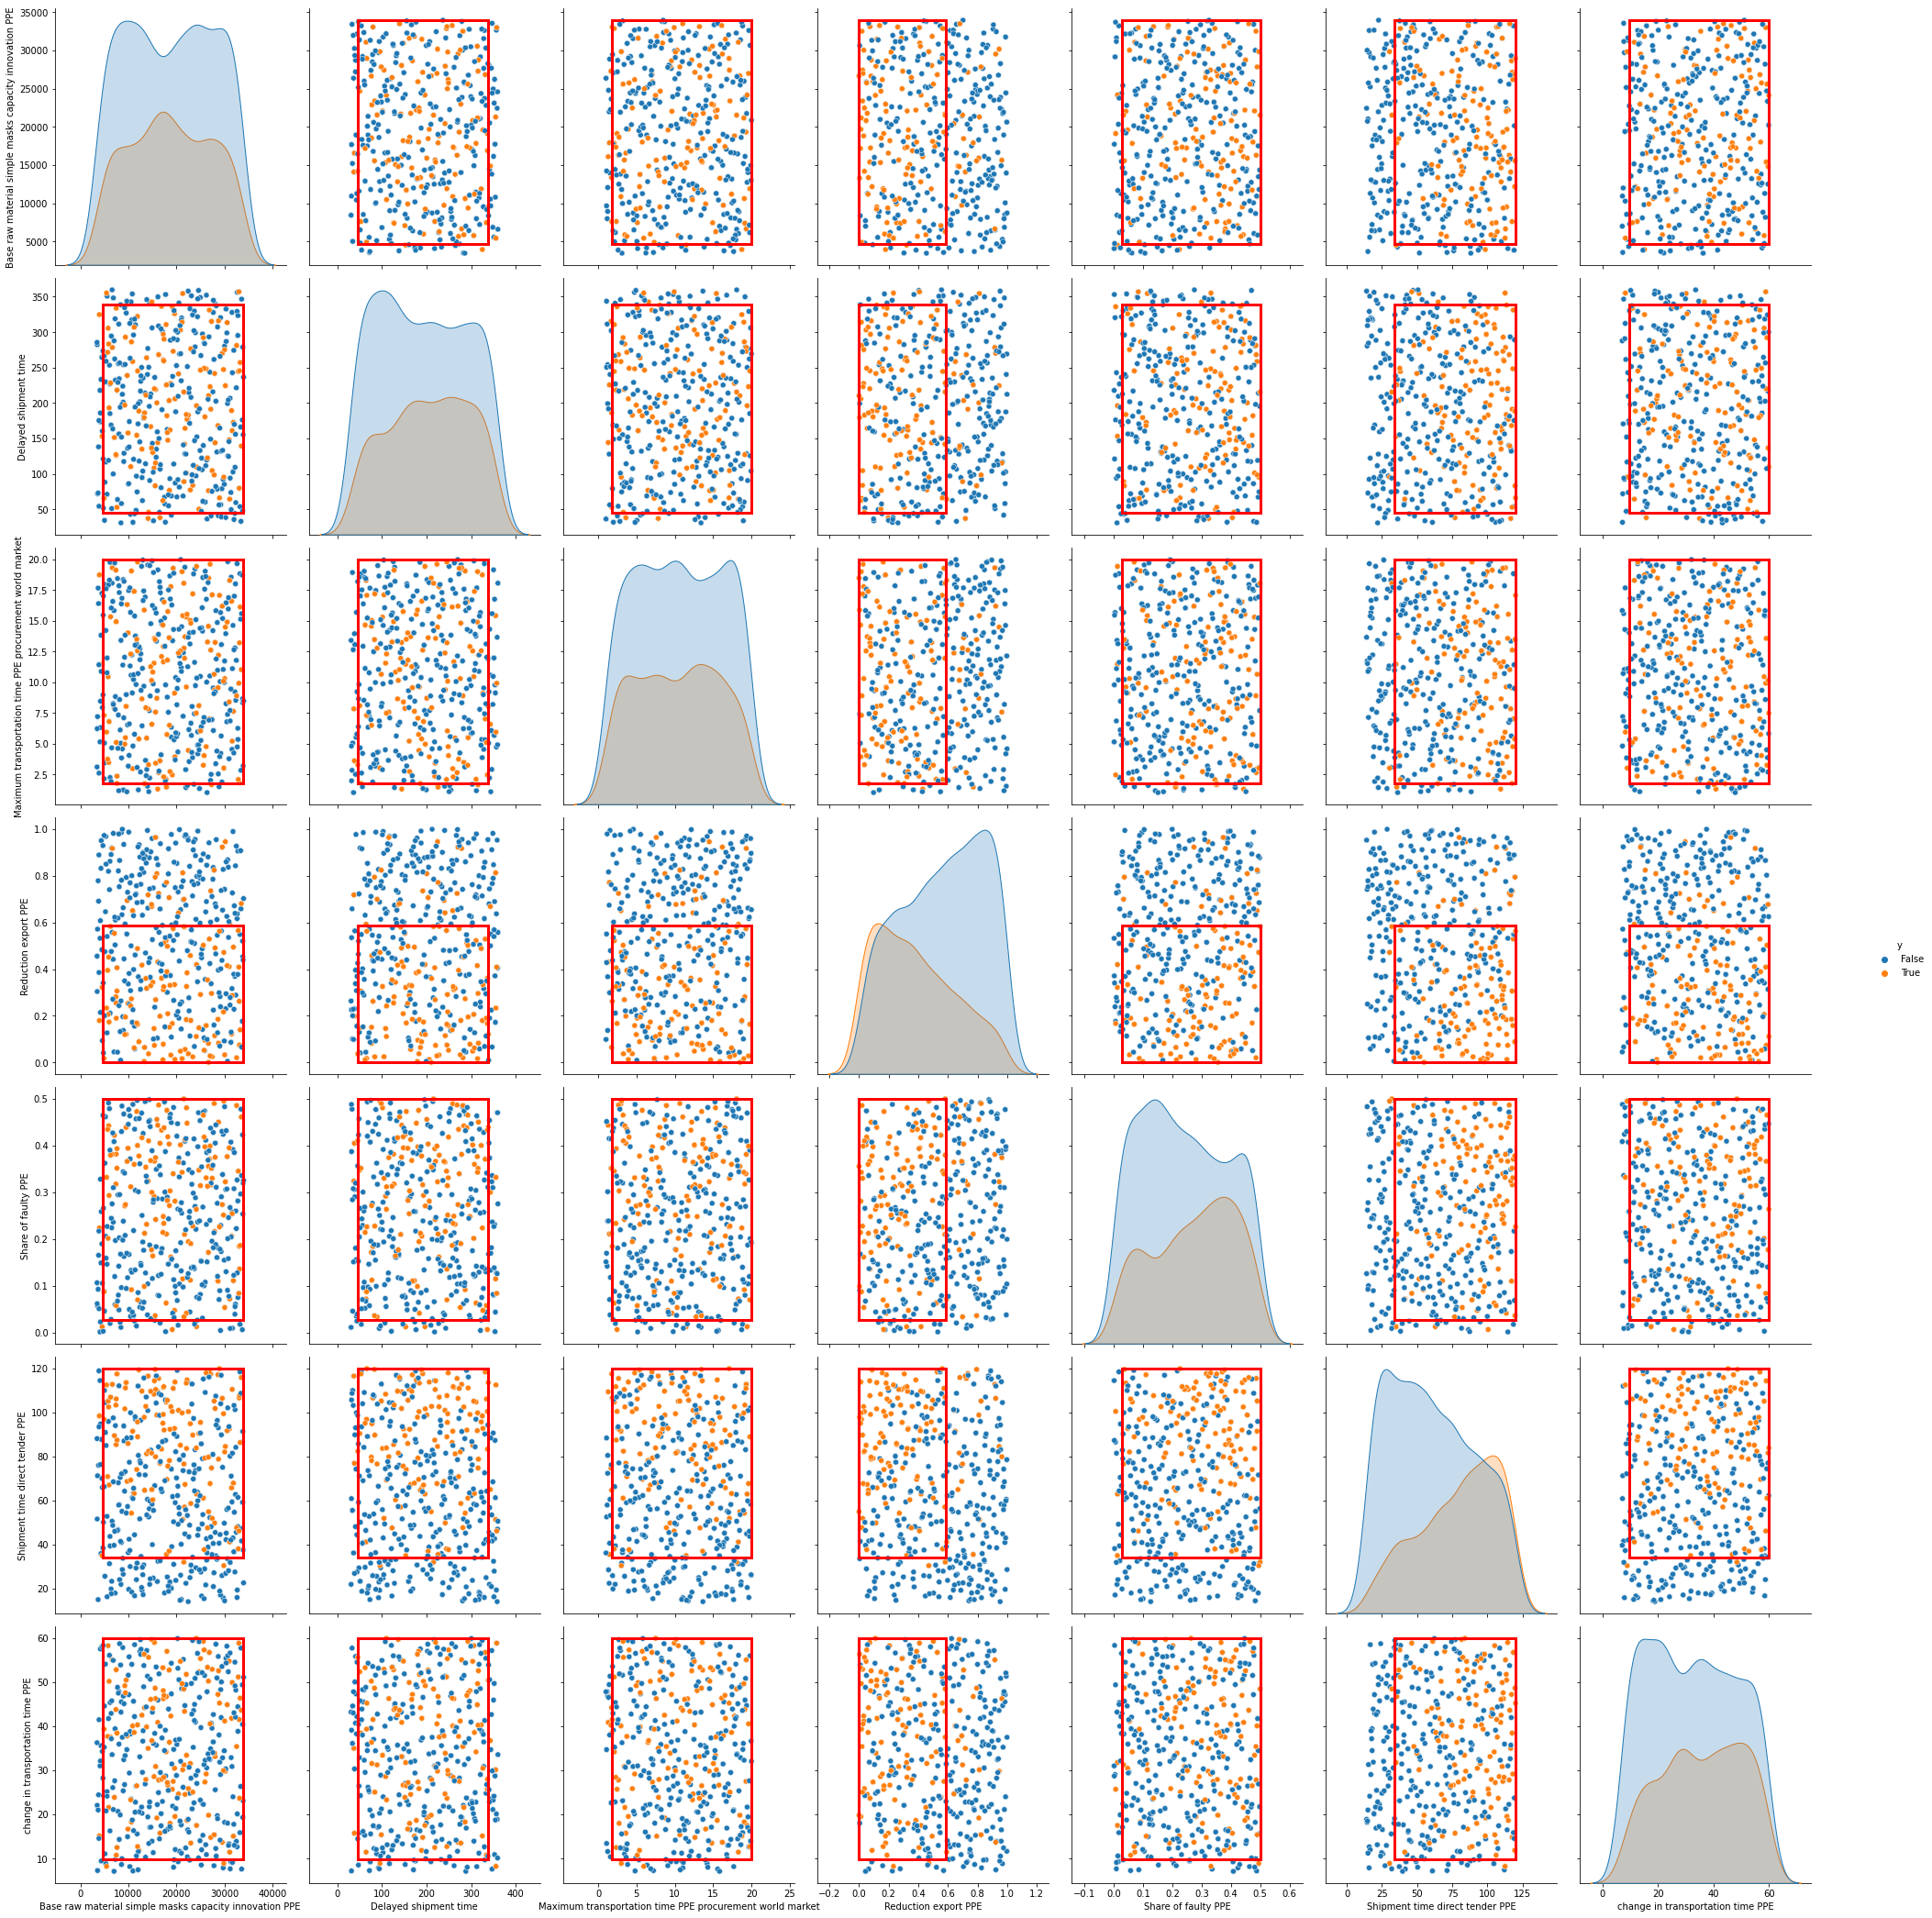

In [32]:
box1.select(19) 
box1.show_pairs_scatter()
fig = plt.gcf()

fig.set_size_inches(30, 30)
# plt.savefig('./figures/step_4_scatter_plot_simplemasks_box19.png')
plt.show()

## Discover Best Case Gloves

In [33]:
# identify the threshold for 30% of the best cases
df_outcome = outcomes['Coverage gloves']
df_outcome = pd.DataFrame(df_outcome)
high_70_percent = df_outcome.quantile(0.7, axis = 0)

In [34]:
high_70_percent = high_70_percent.to_frame()
high_70_percent = high_70_percent[0.7].values[0]

In [35]:
#defiing the worst case for coverage ventilators
y = outcomes['Coverage gloves'] >high_70_percent

[MainProcess/INFO] 2400 points remaining, containing 720 cases of interest
[MainProcess/INFO] mean: 0.8416666666666667, mass: 0.05, coverage: 0.14027777777777778, density: 0.8416666666666667 restricted_dimensions: 16


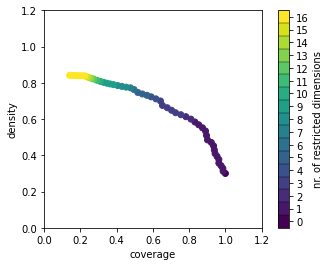

In [36]:
#plotting the trade off between coverage and density
prim_alg = prim.Prim(experiments, y, threshold  = 0.8) 
box2 = prim_alg.find_box()

box2.show_tradeoff()
# plt.savefig("./figures/prim_box_vent_best_case.png")
plt.show()

In [37]:
box2.peeling_trajectory

coverage   density  id    mass      mean res_dim
0   1.000000  0.300000   0  1.0000  0.300000       0
1   0.987500  0.311842   1  0.9500  0.311842       1
2   0.986111  0.327793   2  0.9025  0.327793       1
3   0.976389  0.342593   3  0.8550  0.342593       1
4   0.963889  0.356996   4  0.8100  0.356996       1
5   0.963889  0.376764   5  0.7675  0.376764       1
6   0.954167  0.393471   6  0.7275  0.393471       1
7   0.943056  0.410024   7  0.6900  0.410024       1
8   0.938889  0.430025   8  0.6550  0.430025       1
9   0.934722  0.452285   9  0.6200  0.452285       1
10  0.922222  0.470922  10  0.5875  0.470922       1
11  0.901389  0.485052  11  0.5575  0.485052       1
12  0.895833  0.509479  12  0.5275  0.509479       1
13  0.890278  0.534167  13  0.5000  0.534167       1
14  0.873611  0.551754  14  0.4750  0.551754       1
15  0.852778  0.568519  15  0.4500  0.568519       1
16  0.831944  0.583821  16  0.4275  0.583821       1
17  0.809722  0.599794  17  0.4050  0.599794       2
18  0.781944  0.613290  18  0.3825  0.613290       2
19  0.754167  0.624138  19  0.3625  0.624138       3
20  0.725000  0.635036  20  0.3425  0.635036       3
21  0.702778  0.648718  21  0.3250  0.648718       3
22  0.679167  0.662602  22  0.3075  0.662602       3
23  0.652778  0.675287  23  0.2900  0.675287       3
24  0.641667  0.700000  24  0.2750  0.700000       3
25  0.616667  0.711538  25  0.2600  0.711538       4
26  0.590278  0.722789  26  0.2450  0.722789       4
27  0.566667  0.731183  27  0.2325  0.731183       5
28  0.541667  0.738636  28  0.2200  0.738636       5
29  0.516667  0.746988  29  0.2075  0.746988       5
30  0.495833  0.762821  30  0.1950  0.762821       6
31  0.476389  0.772523  31  0.1850  0.772523       7
32  0.452778  0.776190  32  0.1750  0.776190       8
33  0.429167  0.780303  33  0.1650  0.780303       8
34  0.405556  0.784946  34  0.1550  0.784946       8
35  0.381944  0.790230  35  0.1450  0.790230       9
36  0.363889  0.793939  36  0.1375  0.793939       9
37  0.345833  0.798077  37  0.1300  0.798077       9
38  0.327778  0.802721  38  0.1225  0.802721       9
39  0.309722  0.807971  39  0.1150  0.807971      10
40  0.291667  0.813953  40  0.1075  0.813953      11
41  0.273611  0.820833  41  0.1000  0.820833      12
42  0.261111  0.824561  42  0.0950  0.824561      13
43  0.248611  0.828704  43  0.0900  0.828704      14
44  0.236111  0.833333  44  0.0850  0.833333      15
45  0.223611  0.838542  45  0.0800  0.838542      16
46  0.209722  0.838889  46  0.0750  0.838889      16
47  0.195833  0.839286  47  0.0700  0.839286      16
48  0.181944  0.839744  48  0.0650  0.839744      16
49  0.168056  0.840278  49  0.0600  0.840278      16
50  0.154167  0.840909  50  0.0550  0.840909      16
51  0.140278  0.841667  51  0.0500  0.841667      16

### Inspect Box 18 Gloves

coverage    0.781944
density      0.61329
id                18
mass          0.3825
mean         0.61329
res_dim            2
Name: 18, dtype: object

                                    box 18             \
                                       min        max   
Shipment time direct tender PPE  14.076418  59.269406   
Reduction export PPE              0.105174   0.998436   

                                                                
                                                     qp values  
Shipment time direct tender PPE  [-1.0, 2.807941978021037e-75]  
Reduction export PPE                [0.0373470121378238, -1.0]  



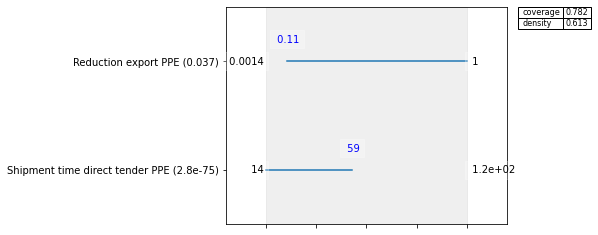

In [39]:
#box 18 is only box interesting for best case
box2.inspect(18)
box2.inspect(18, style='graph')
# plt.savefig("./figures/prim_box18_inspect_gloves_bestcase.png")
plt.show()

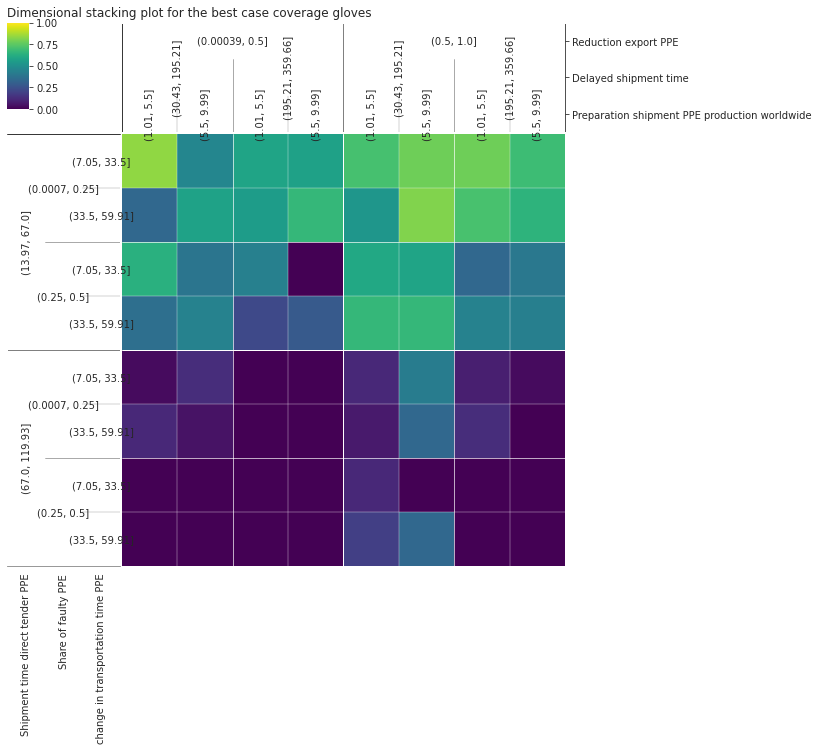

In [40]:
dimensional_stacking.create_pivot_plot(experiments, y, nbins =2, bin_labels=True)
plt.title('Dimensional stacking plot for the best case coverage gloves', loc='left')
# plt.savefig('./Figures/step_4_dmn_stack_simple_masks_box19.png')
plt.show()

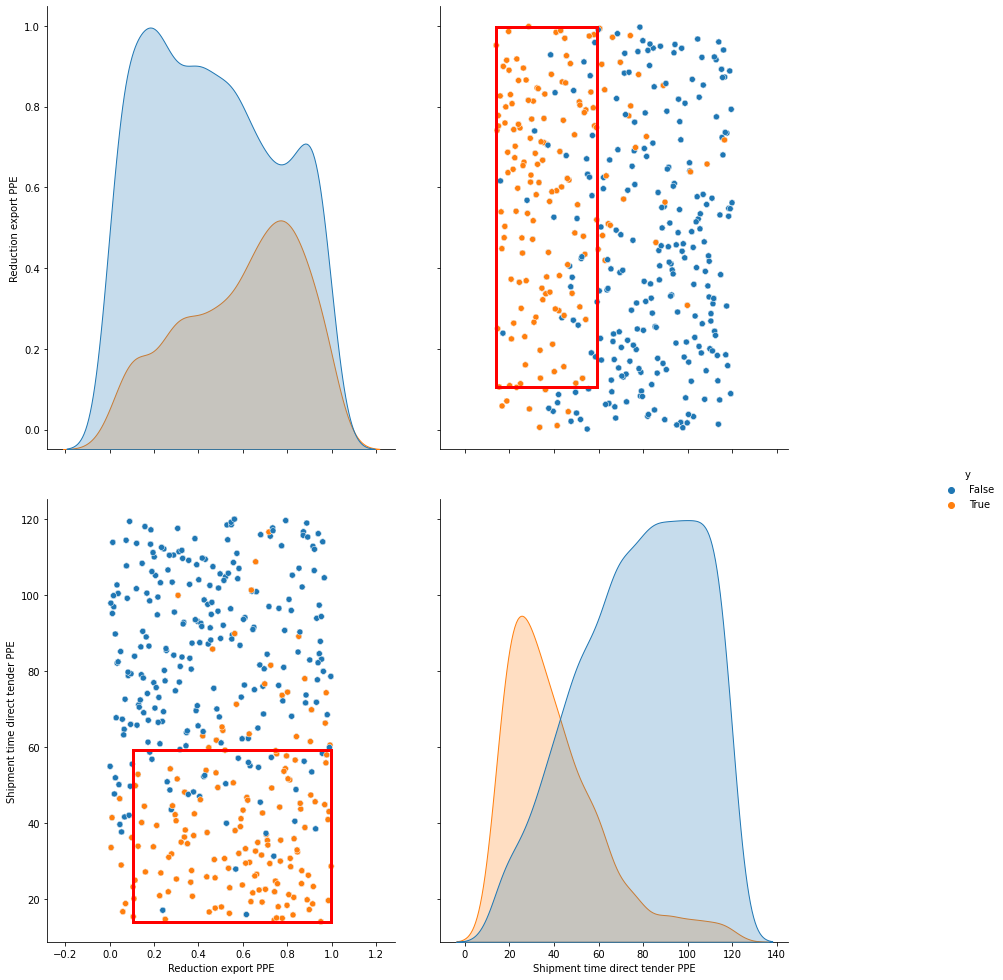

In [41]:
box2.select(18) 
box2.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(15, 15)
# plt.savefig('./figures/step_4_scatter_plot_gloves_box18.png')
plt.show()

## Discover Best Case Simple Masks

In [42]:
# identify the threshold for 40% of the best cases
df_outcome = outcomes['Coverage simple masks']
df_outcome = pd.DataFrame(df_outcome)
high_60_percent = df_outcome.quantile(0.6, axis = 0)

In [43]:
high_60_percent = high_60_percent.to_frame()
high_60_percent = high_60_percent[0.6].values[0]

In [44]:
high_60_percent

203.445142

In [45]:
#defiing the worst case for coverage ventilators
y = outcomes['Coverage simple masks'] >high_60_percent

[MainProcess/INFO] 2400 points remaining, containing 960 cases of interest
[MainProcess/INFO] mean: 0.875, mass: 0.05, coverage: 0.109375, density: 0.875 restricted_dimensions: 15


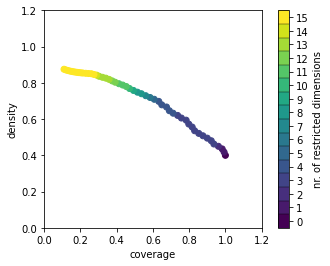

In [46]:
#plotting the trade off between coverage and density
prim_alg = prim.Prim(experiments, y, threshold  = 0.8) 
box3 = prim_alg.find_box()

box3.show_tradeoff()
# plt.savefig("./figures/prim_box_simplemasks_best_case.png")
plt.show()

In [47]:
box3.peeling_trajectory

coverage   density  id    mass      mean res_dim
0   1.000000  0.400000   0  1.0000  0.400000       0
1   0.992708  0.417982   1  0.9500  0.417982       1
2   0.982292  0.435365   2  0.9025  0.435365       1
3   0.961458  0.449805   3  0.8550  0.449805       2
4   0.936458  0.462449   4  0.8100  0.462449       3
5   0.921875  0.480456   5  0.7675  0.480456       3
6   0.900000  0.494845   6  0.7275  0.494845       3
7   0.876042  0.507850   7  0.6900  0.507850       3
8   0.853125  0.520992   8  0.6550  0.520992       3
9   0.830208  0.535618   9  0.6200  0.535618       3
10  0.816667  0.556028  10  0.5875  0.556028       3
11  0.797917  0.572496  11  0.5575  0.572496       3
12  0.783333  0.593997  12  0.5275  0.593997       3
13  0.757292  0.605833  13  0.5000  0.605833       3
14  0.736458  0.620175  14  0.4750  0.620175       3
15  0.711458  0.632407  15  0.4500  0.632407       4
16  0.690625  0.646199  16  0.4275  0.646199       4
17  0.675000  0.666667  17  0.4050  0.666667       4
18  0.648958  0.678649  18  0.3825  0.678649       4
19  0.632292  0.697701  19  0.3625  0.697701       4
20  0.607292  0.709246  20  0.3425  0.709246       5
21  0.584375  0.719231  21  0.3250  0.719231       6
22  0.560417  0.728997  22  0.3075  0.728997       7
23  0.536458  0.739943  23  0.2900  0.739943       8
24  0.514583  0.748485  24  0.2750  0.748485       8
25  0.492708  0.758013  25  0.2600  0.758013       9
26  0.470833  0.768707  26  0.2450  0.768707      10
27  0.453125  0.779570  27  0.2325  0.779570      11
28  0.433333  0.787879  28  0.2200  0.787879      11
29  0.412500  0.795181  29  0.2075  0.795181      11
30  0.391667  0.803419  30  0.1950  0.803419      12
31  0.375000  0.810811  31  0.1850  0.810811      12
32  0.358333  0.819048  32  0.1750  0.819048      13
33  0.340625  0.825758  33  0.1650  0.825758      13
34  0.321875  0.830645  34  0.1550  0.830645      13
35  0.303125  0.836207  35  0.1450  0.836207      13
36  0.289583  0.842424  36  0.1375  0.842424      14
37  0.275000  0.846154  37  0.1300  0.846154      15
38  0.260417  0.850340  38  0.1225  0.850340      15
39  0.244792  0.851449  39  0.1150  0.851449      15
40  0.229167  0.852713  40  0.1075  0.852713      15
41  0.213542  0.854167  41  0.1000  0.854167      15
42  0.203125  0.855263  42  0.0950  0.855263      15
43  0.192708  0.856481  43  0.0900  0.856481      15
44  0.182292  0.857843  44  0.0850  0.857843      15
45  0.171875  0.859375  45  0.0800  0.859375      15
46  0.161458  0.861111  46  0.0750  0.861111      15
47  0.151042  0.863095  47  0.0700  0.863095      15
48  0.140625  0.865385  48  0.0650  0.865385      15
49  0.130208  0.868056  49  0.0600  0.868056      15
50  0.119792  0.871212  50  0.0550  0.871212      15
51  0.109375  0.875000  51  0.0500  0.875000      15

coverage    0.736458
density     0.620175
id                14
mass           0.475
mean        0.620175
res_dim            3
Name: 14, dtype: object

                                                           box 14  \
                                                              min   
Shipment time direct tender PPE                         14.076418   
Base raw material simple masks capacity direct ...  240708.560262   
Reduction export PPE                                     0.102780   

                                                                  \
                                                             max   
Shipment time direct tender PPE                     7.625363e+01   
Base raw material simple masks capacity direct ...  1.995501e+06   
Reduction export PPE                                9.984360e-01   

                                                                                    
                                                                         qp v

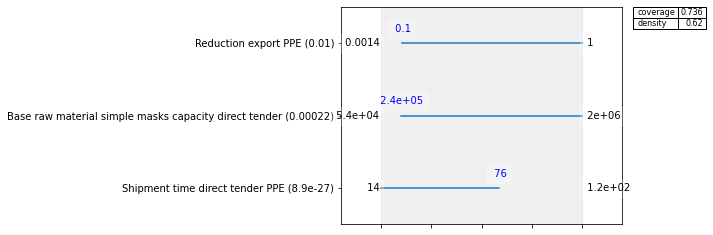

In [48]:
#box 14 is only box interesting for best case
box3.inspect(14)
box3.inspect(14, style='graph')
# plt.savefig("./figures/prim_box14_inspect_simplemasks_bestcase.png")
plt.show()

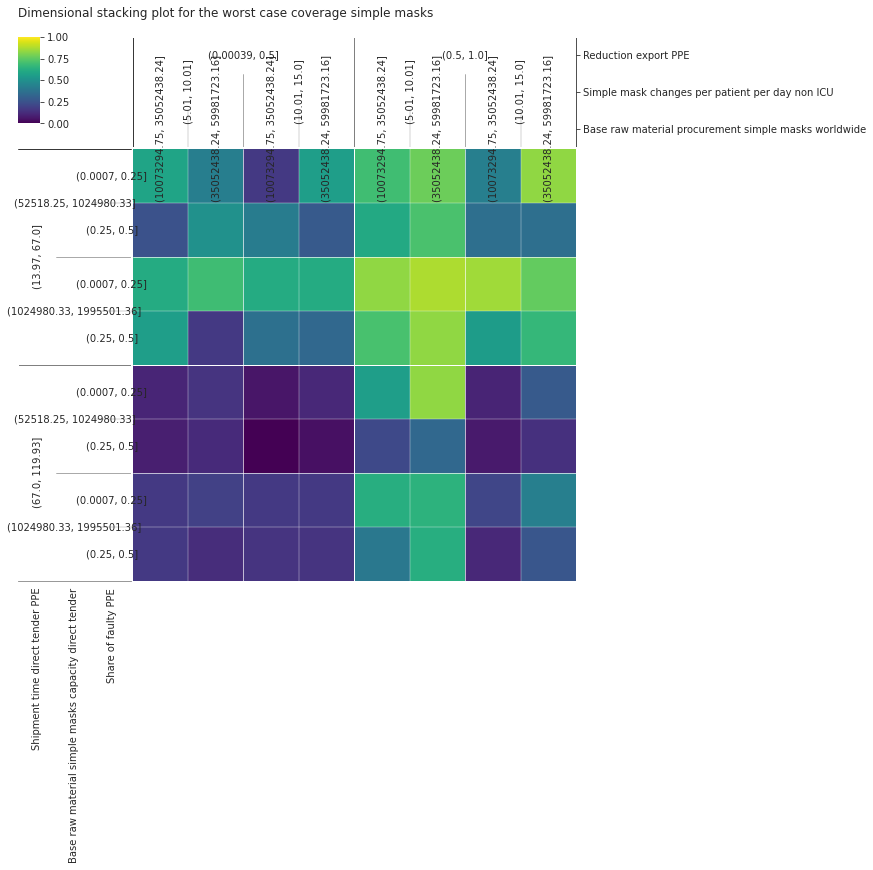

In [49]:
dimensional_stacking.create_pivot_plot(experiments, y, nbins =2, bin_labels=True)
plt.title('Dimensional stacking plot for the worst case coverage simple masks', loc='left', pad=20)
# plt.savefig('./figures/step_4_dmn_stack_simple_masks_box14.png')
plt.show()

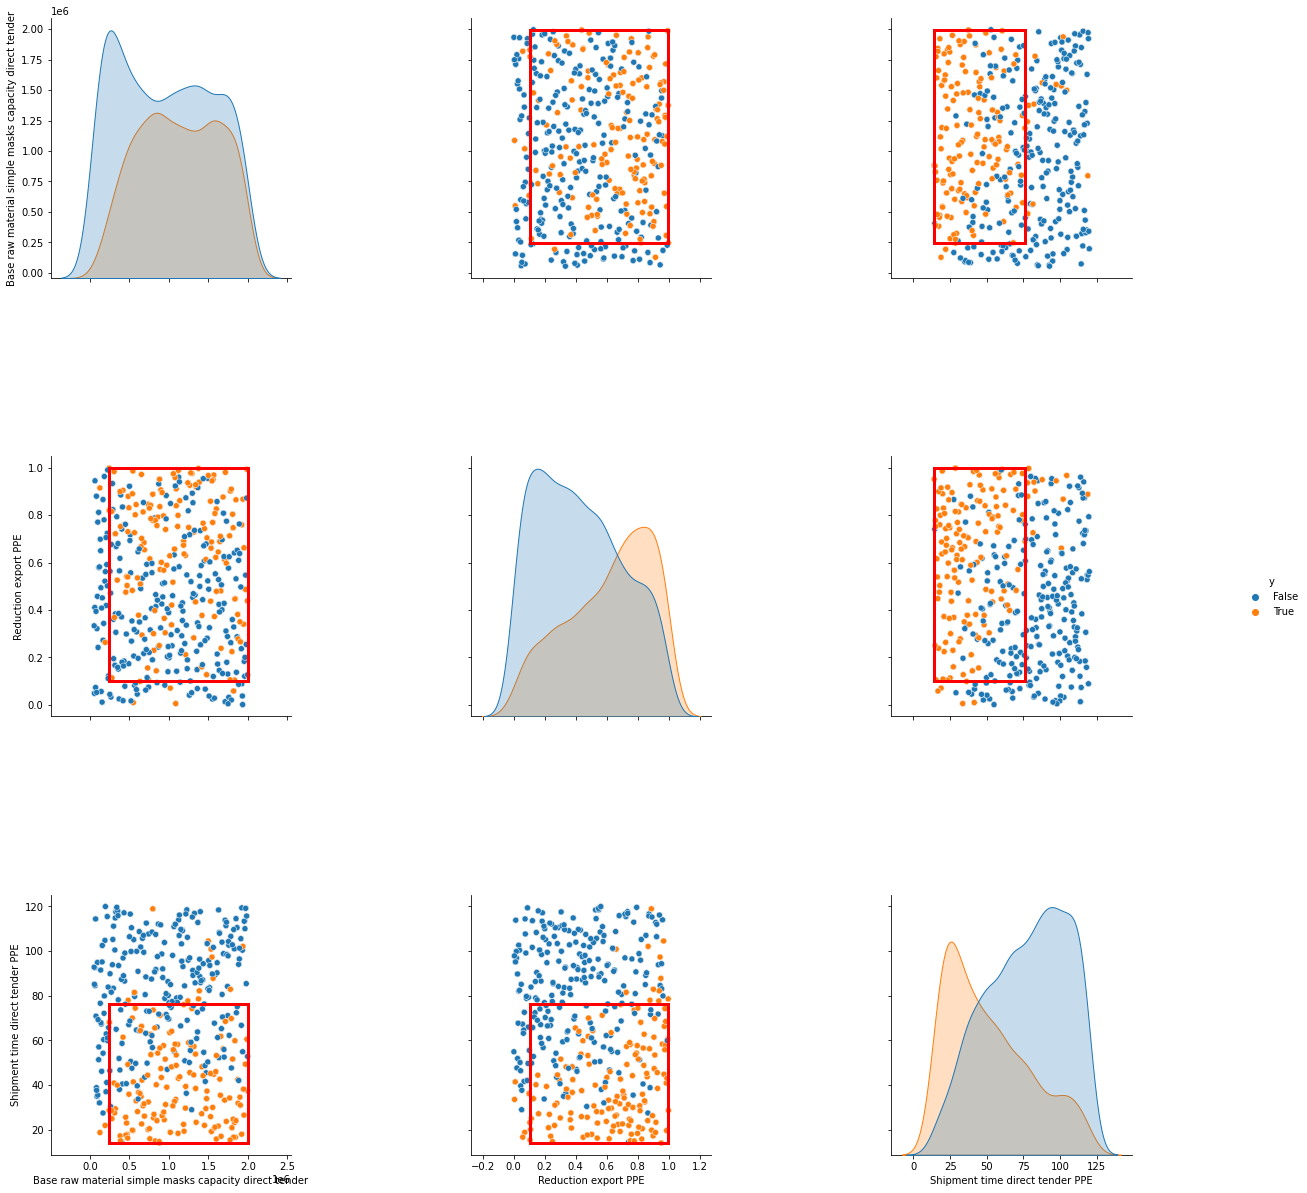

In [50]:
box3.select(14) 
box3.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(20, 20)
# plt.savefig('./figures/step_4_scatter_plot_gloves_box14.png')
plt.show()